In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer as ps
import igraph as ig
import tqdm
import string

In [4]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\halan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\halan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\halan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\halan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\halan\AppData\Roaming\nltk_data...
[

True

In [5]:
# Test code to see how these functions work

text = "This is an example of a bigram in Python"
tokens = word_tokenize(text)  # Tokenizing the text
bigrams = list(ngrams(tokens, 2))  # Creating bigrams

In [6]:
# More test code

print(text)

print(bigrams)

This is an example of a bigram in Python
[('This', 'is'), ('is', 'an'), ('an', 'example'), ('example', 'of'), ('of', 'a'), ('a', 'bigram'), ('bigram', 'in'), ('in', 'Python')]


In [7]:
# Importing dataset
data = pd.read_csv('Sedona_Reviews_With_Sentiment.csv')

In [8]:
# Viewing dataset
data['Review Text']

0      Clean secure apartments in a great location wi...
1      Just excellent people at the Main Office. Clau...
2      I have never written a review before, but I ju...
3      So far the experience has been great and the r...
4      Extremely nice people at The Sedona. My apartm...
                             ...                        
178    Was top but is steadily declining. Halls are d...
179    The apartments are well-appointed, the staff i...
180    Up to now, I have been happy at The Sedona. A ...
181    I absolutely love living at The Sedona! Everyt...
182    Very professional staff and they keep the livi...
Name: Review Text, Length: 183, dtype: object

In [9]:
# Tokenizing text here

# Normal word_tokenizer splits up apostrophes
# TweetTokenizer does not: "it" "'s" vs "it's"

# Defining list
tokenizedText = []

# The way TweetTokenizer works it needs an instance for it to work
ttk = TweetTokenizer()

# Loop that will tokenize the text and append it to the list
for i in data['Review Text']:
    tokenizedText.append(list(ttk.tokenize(i)))

# Checking the text
print(tokenizedText[0])
print(tokenizedText[6])

['Clean', 'secure', 'apartments', 'in', 'a', 'great', 'location', 'with', 'a', 'wonderful', 'staff', 'always', 'ready', 'to', 'assist', 'you', '.', 'Grounds', 'are', 'well', 'kept', 'and', 'overall', "it's", 'an', 'extremely', 'peaceful', 'facility', '.', 'The', 'one', 'issue', 'we', 'had', 'was', 'addressed', 'within', 'the', 'hour', 'with', 'after', 'hours', 'service', '.']
['Sedona', 'Apartment', 'Homes', 'is', 'the', 'place', 'to', 'be', 'called', 'home', '.', 'The', 'property', 'is', 'astonishing', '...', 'The', 'lakes', 'are', 'breathtaking', '!', 'Peaceful', 'and', 'quiet', '.', 'The', 'property', 'itself', 'is', 'well', 'located', 'but', 'it', "doesn't", 'feel', 'like', 'you', 'are', 'in', 'the', 'middle', 'of', 'the', 'traffic', 'chaos', 'area', '.', 'I', 'love', 'this', 'place', 'in', 'many', 'ways', '!', '!', '!']


In [10]:
# Lemmatizing the text

# Defining the list
filteredSentence = []

# Defining the stop words
stopWords = set(stopwords.words('english'))

# Looping
for i in tokenizedText:
    filteredSentence.append([w for w in i if not w.lower() in stopWords])
    
print(filteredSentence[0])
print(filteredSentence[6])

['Clean', 'secure', 'apartments', 'great', 'location', 'wonderful', 'staff', 'always', 'ready', 'assist', '.', 'Grounds', 'well', 'kept', 'overall', 'extremely', 'peaceful', 'facility', '.', 'one', 'issue', 'addressed', 'within', 'hour', 'hours', 'service', '.']
['Sedona', 'Apartment', 'Homes', 'place', 'called', 'home', '.', 'property', 'astonishing', '...', 'lakes', 'breathtaking', '!', 'Peaceful', 'quiet', '.', 'property', 'well', 'located', 'feel', 'like', 'middle', 'traffic', 'chaos', 'area', '.', 'love', 'place', 'many', 'ways', '!', '!', '!']


In [57]:
# Removing Punctuation so it doesn't count them as words for bigram
translator = str.maketrans('', '', string.punctuation)
print(filteredSentence[0])
print(' '.join([char for char in filteredSentence[0] if char not in string.punctuation]))

['Clean', 'secure', 'apartments', 'great', 'location', 'wonderful', 'staff', 'always', 'ready', 'assist', '.', 'Grounds', 'well', 'kept', 'overall', 'extremely', 'peaceful', 'facility', '.', 'one', 'issue', 'addressed', 'within', 'hour', 'hours', 'service', '.']
Clean secure apartments great location wonderful staff always ready assist Grounds well kept overall extremely peaceful facility one issue addressed within hour hours service


In [11]:
# Creating the bigram

# Defining the list
bigramText = []
bigramTextLem = []

# Looping through all the text to create bigram
for i in tokenizedText:
    bigramText.append(list(ngrams(i, 2)))

for i in filteredSentence:
    bigramTextLem.append(list(ngrams(i, 2)))

In [35]:
# Getting a count for all words.
wordCount = {}

for words in bigramText:
    for word in words:
        if word not in wordCount:
            wordCount[word] = 1
        else:
            wordCount[word] += 1

wordCountLem = {}

for words in bigramTextLem:
    for word in words:
        if word not in wordCountLem:
            wordCountLem[word] = 1
        else:
            wordCountLem[word] += 1


print(wordCount)

{('Clean', 'secure'): 2, ('secure', 'apartments'): 2, ('apartments', 'in'): 2, ('in', 'a'): 10, ('a', 'great'): 7, ('great', 'location'): 2, ('location', 'with'): 2, ('with', 'a'): 7, ('a', 'wonderful'): 3, ('wonderful', 'staff'): 2, ('staff', 'always'): 2, ('always', 'ready'): 2, ('ready', 'to'): 2, ('to', 'assist'): 2, ('assist', 'you'): 2, ('you', '.'): 4, ('.', 'Grounds'): 2, ('Grounds', 'are'): 2, ('are', 'well'): 5, ('well', 'kept'): 8, ('kept', 'and'): 4, ('and', 'overall'): 2, ('overall', "it's"): 3, ("it's", 'an'): 3, ('an', 'extremely'): 3, ('extremely', 'peaceful'): 2, ('peaceful', 'facility'): 2, ('facility', '.'): 2, ('.', 'The'): 100, ('The', 'one'): 1, ('one', 'issue'): 1, ('issue', 'we'): 1, ('we', 'had'): 1, ('had', 'was'): 1, ('was', 'addressed'): 1, ('addressed', 'within'): 1, ('within', 'the'): 1, ('the', 'hour'): 1, ('hour', 'with'): 1, ('with', 'after'): 1, ('after', 'hours'): 1, ('hours', 'service'): 1, ('service', '.'): 4, ('Just', 'excellent'): 2, ('excellent',

In [37]:
wordCountDF = pd.DataFrame({'word': [k for k in wordCount.keys()], 'cnt': [v for v in wordCount.values()]})

In [38]:
len(wordCountDF)

4298

In [39]:
wordCountDF[['cnt']].describe()

,cnt
count,4298.000000
mean,1.628664
std,2.517583
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,100.000000


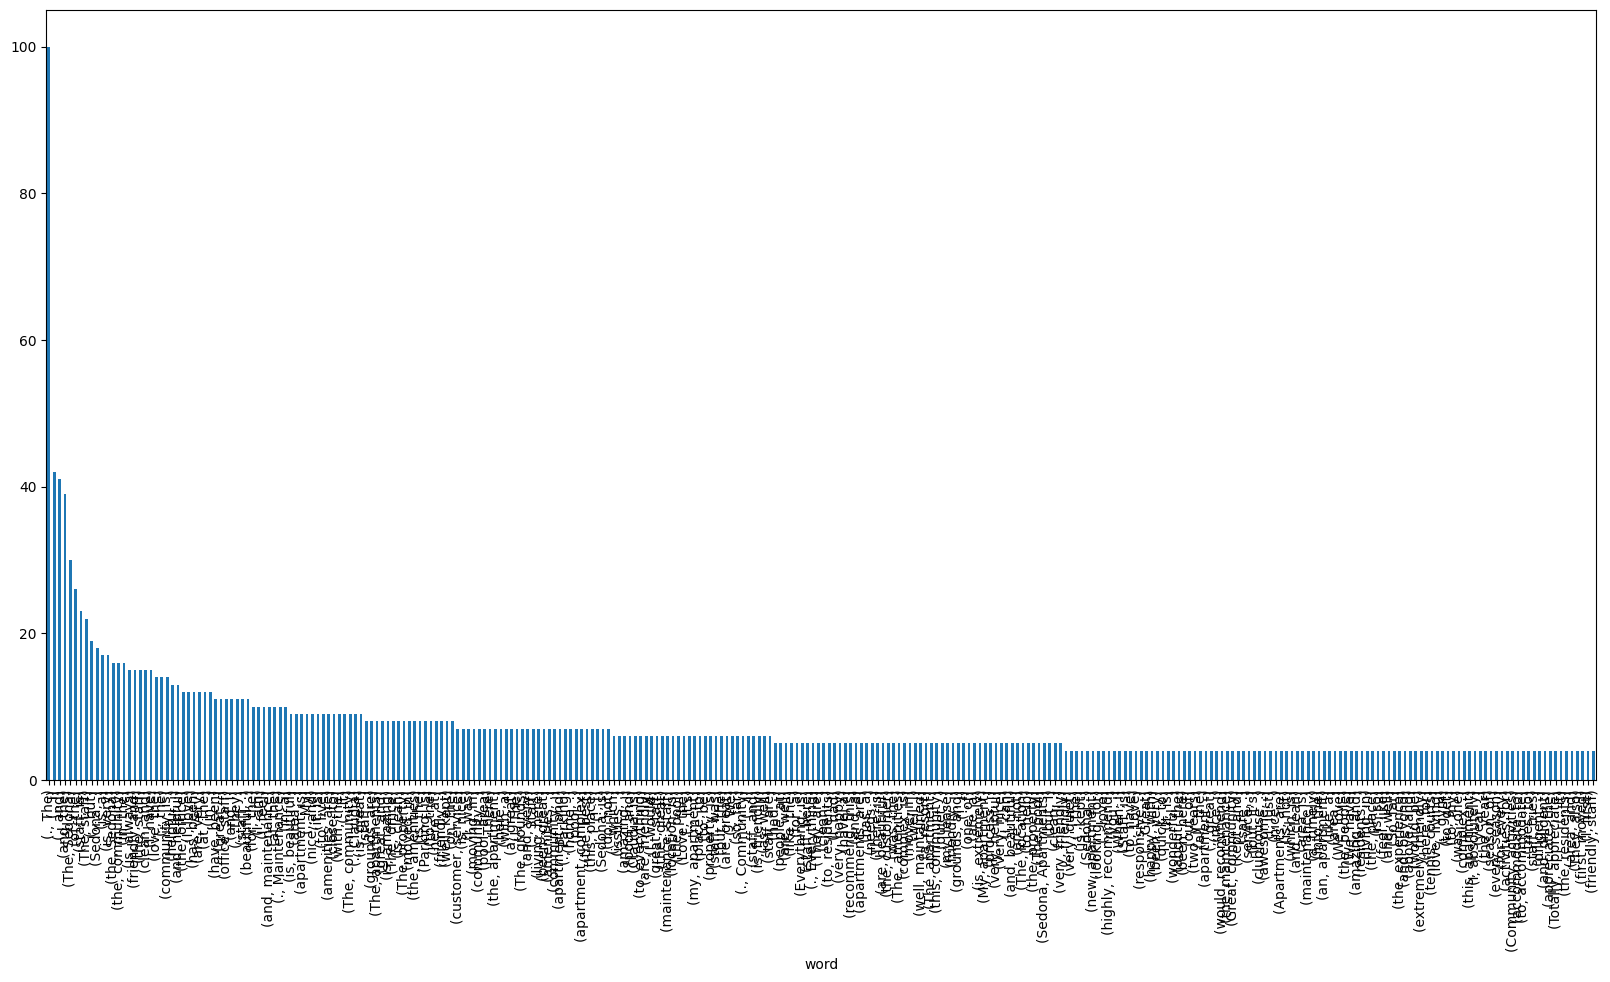

In [46]:
temp = wordCountDF[wordCountDF['cnt'] > 3]
temp.sort_values(by='cnt', ascending=False).plot(kind='bar', x='word', y='cnt', figsize=(20,10), legend=False)
plt.show()

In [47]:
wordCountLemDF = pd.DataFrame({'word': [k for k in wordCountLem.keys()], 'cnt': [v for v in wordCountLem.values()]})

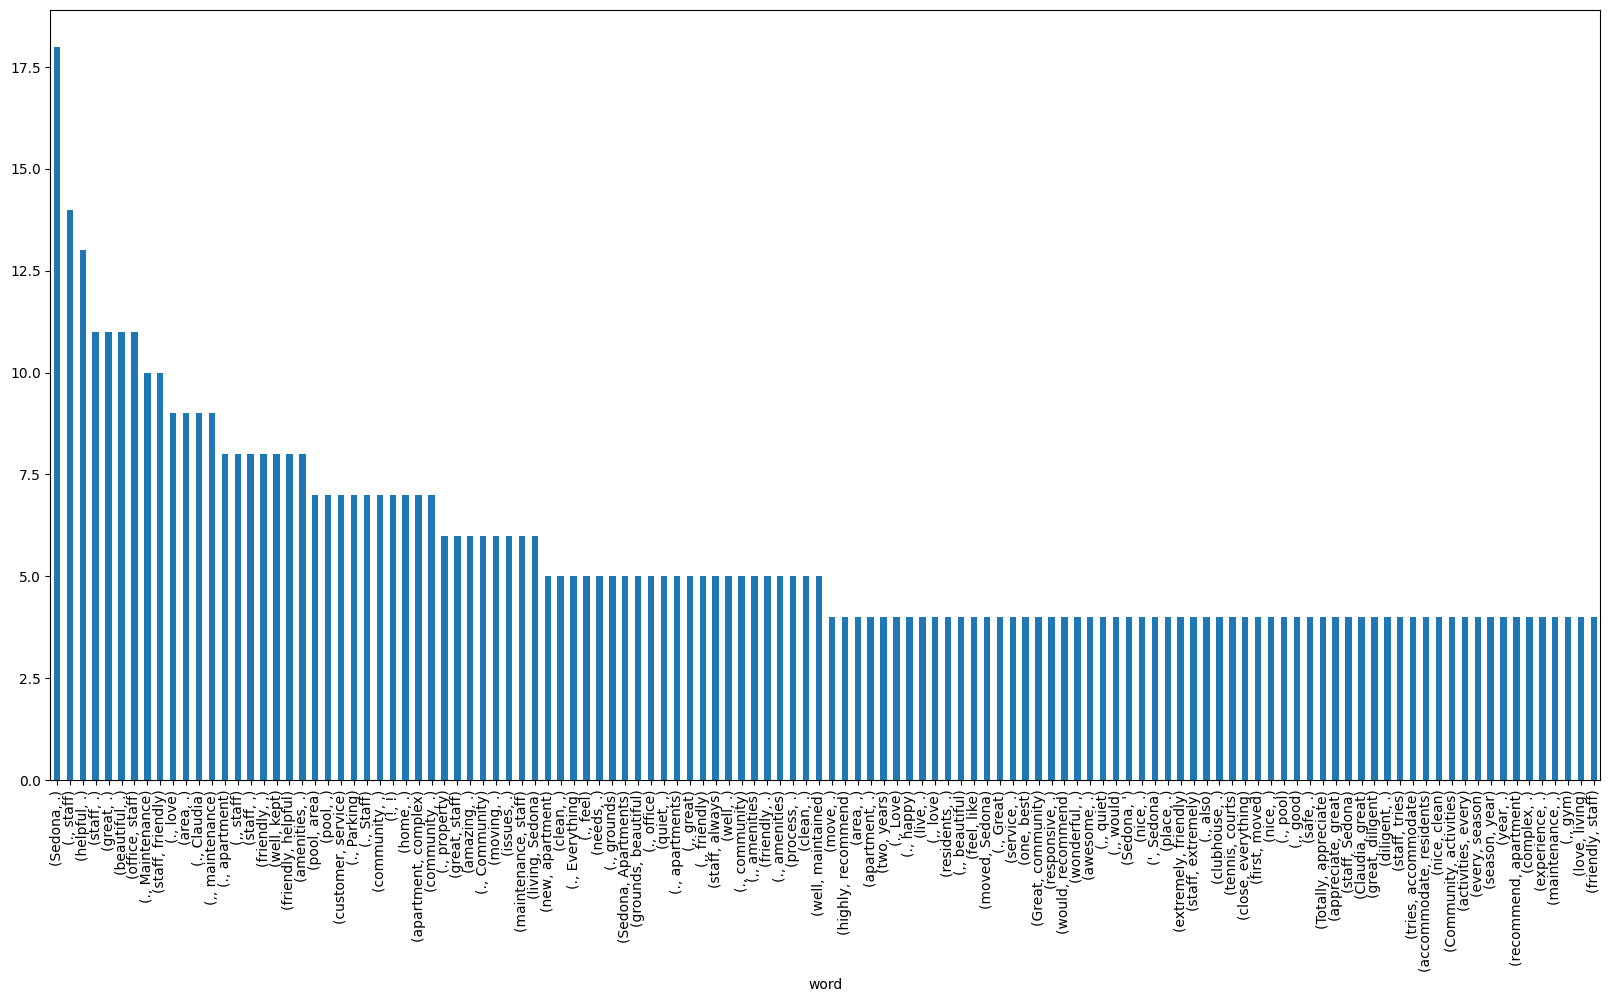

In [48]:
temp = wordCountLemDF[wordCountLemDF['cnt'] > 3]
temp.sort_values(by='cnt', ascending=False).plot(kind='bar', x='word', y='cnt', figsize=(20,10), legend=False)
plt.show()